# 第一題

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/機器學習/期中考/觀測站整理.csv")
# df.head()
df2 = pd.read_csv("/content/drive/MyDrive/機器學習/期中考/4_activity.csv")





# 取出cal與step欄位
df2 = df2[df2['unit'].isin(['cal', 'step'])]

# 將時間轉換為datetime格式
df2['time'] = pd.to_datetime(df2['time'])
df2['endTime'] = pd.to_datetime(df2['endTime'])

# 計算step的總和
df_step = df2[df2['unit'] == 'step'].groupby(pd.Grouper(key='time', freq='1H'))['value'].sum().reset_index()
df_step.rename(columns={'value': 'step'}, inplace=True)

# 計算cal的總和
df_cal = df2[df2['unit'] == 'cal'].groupby(pd.Grouper(key='time', freq='1H'))['value'].sum().reset_index()
df_cal.rename(columns={'value': 'cal'}, inplace=True)

# 合併資料
df_final = pd.merge(df_step, df_cal, how='outer', on='time').fillna(0)

# # 顯示資料
# print(df_final)

df['time'] = pd.to_datetime(df['time'])

df_final = pd.merge(df, df_step, how='left', left_on='time', right_on='time')
df_final = pd.merge(df_final, df_cal, how='left', left_on='time', right_on='time')



df_final.fillna(0, inplace=True)

df_final.head(20)

# df_final.to_csv('/content/drive/MyDrive/機器學習/期中考/觀測站整理.csv', index=False)




Mounted at /content/drive


,Unnamed: 0,time,endTime,StnPres,SeaPres,Temperature,Td dew point,RH,WS,WD,...,WDGust,Precp,PrecpHour,SunShine,GloblRad,Visb,UVI,Cloud Amount,step,cal
0,0,2023-02-06 00:00:00,2023/2/6 01:00,1014.0,1015.1,17.1,15.6,91,3.5,360,...,340,0,0.0,...,0.00,...,0,...,0.0,0.0
1,1,2023-02-06 01:00:00,2023/2/6 02:00,1014.0,1015.1,17.0,15.7,92,4.6,360,...,10,0,0.0,...,0.00,...,0,...,0.0,0.0
2,2,2023-02-06 02:00:00,2023/2/6 03:00,1013.5,1014.6,17.3,15.8,91,2.7,30,...,360,0,0.0,...,0.00,...,0,...,0.0,0.0
3,3,2023-02-06 03:00:00,2023/2/6 04:00,1013.3,1014.4,17.1,16.0,93,3.2,360,...,360,0,0.0,...,0.00,...,0,...,0.0,0.0
4,4,2023-02-06 04:00:00,2023/2/6 05:00,1013.1,1014.2,16.8,15.8,94,3.4,10,...,30,0,0.0,...,0.00,...,0,...,0.0,0.0
5,5,2023-02-06 05:00:00,2023/2/6 06:00,1013.6,1014.7,17.4,16.3,93,1.3,20,...,20,0,0.0,0,0.00,...,0,...,0.0,0.0
6,6,2023-02-06 06:00:00,2023/2/6 07:00,1013.9,1015.0,17.6,16.3,92,1.5,360,...,350,0,0.0,0,0.01,...,0,...,0.0,0.0
7,7,2023-02-06 07:00:00,2023/2/6 08:00,1014.2,1015.3,17.9,16.2,90,2.4,360,...,360,0,0.0,0,0.20,...,0,...,0.0,0.0
8,8,2023-02-06 08:00:00,2023/2/6 09:00,1015.0,1016.1,19.5,16.5,83,4.0,10,...,20,0,0.0,0,0.54,...,1,...,1306.0,65.0
9,9,2023-02-06 09:00:00,2023/2/6 10:00,1015.2,1016.3,21.0,16.8,77,5.3,360,...,360,0,0.0,0.1,1.15,...,2,...,1935.0,100.0


# 第二題

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: >

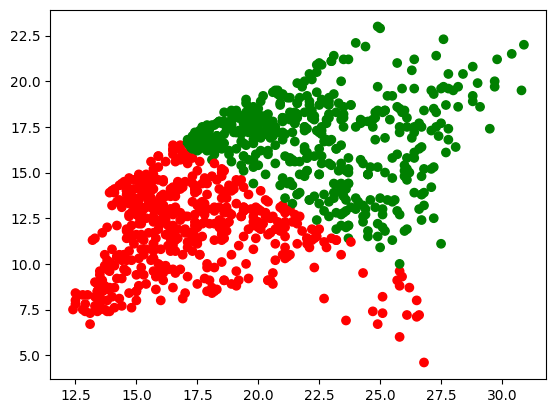

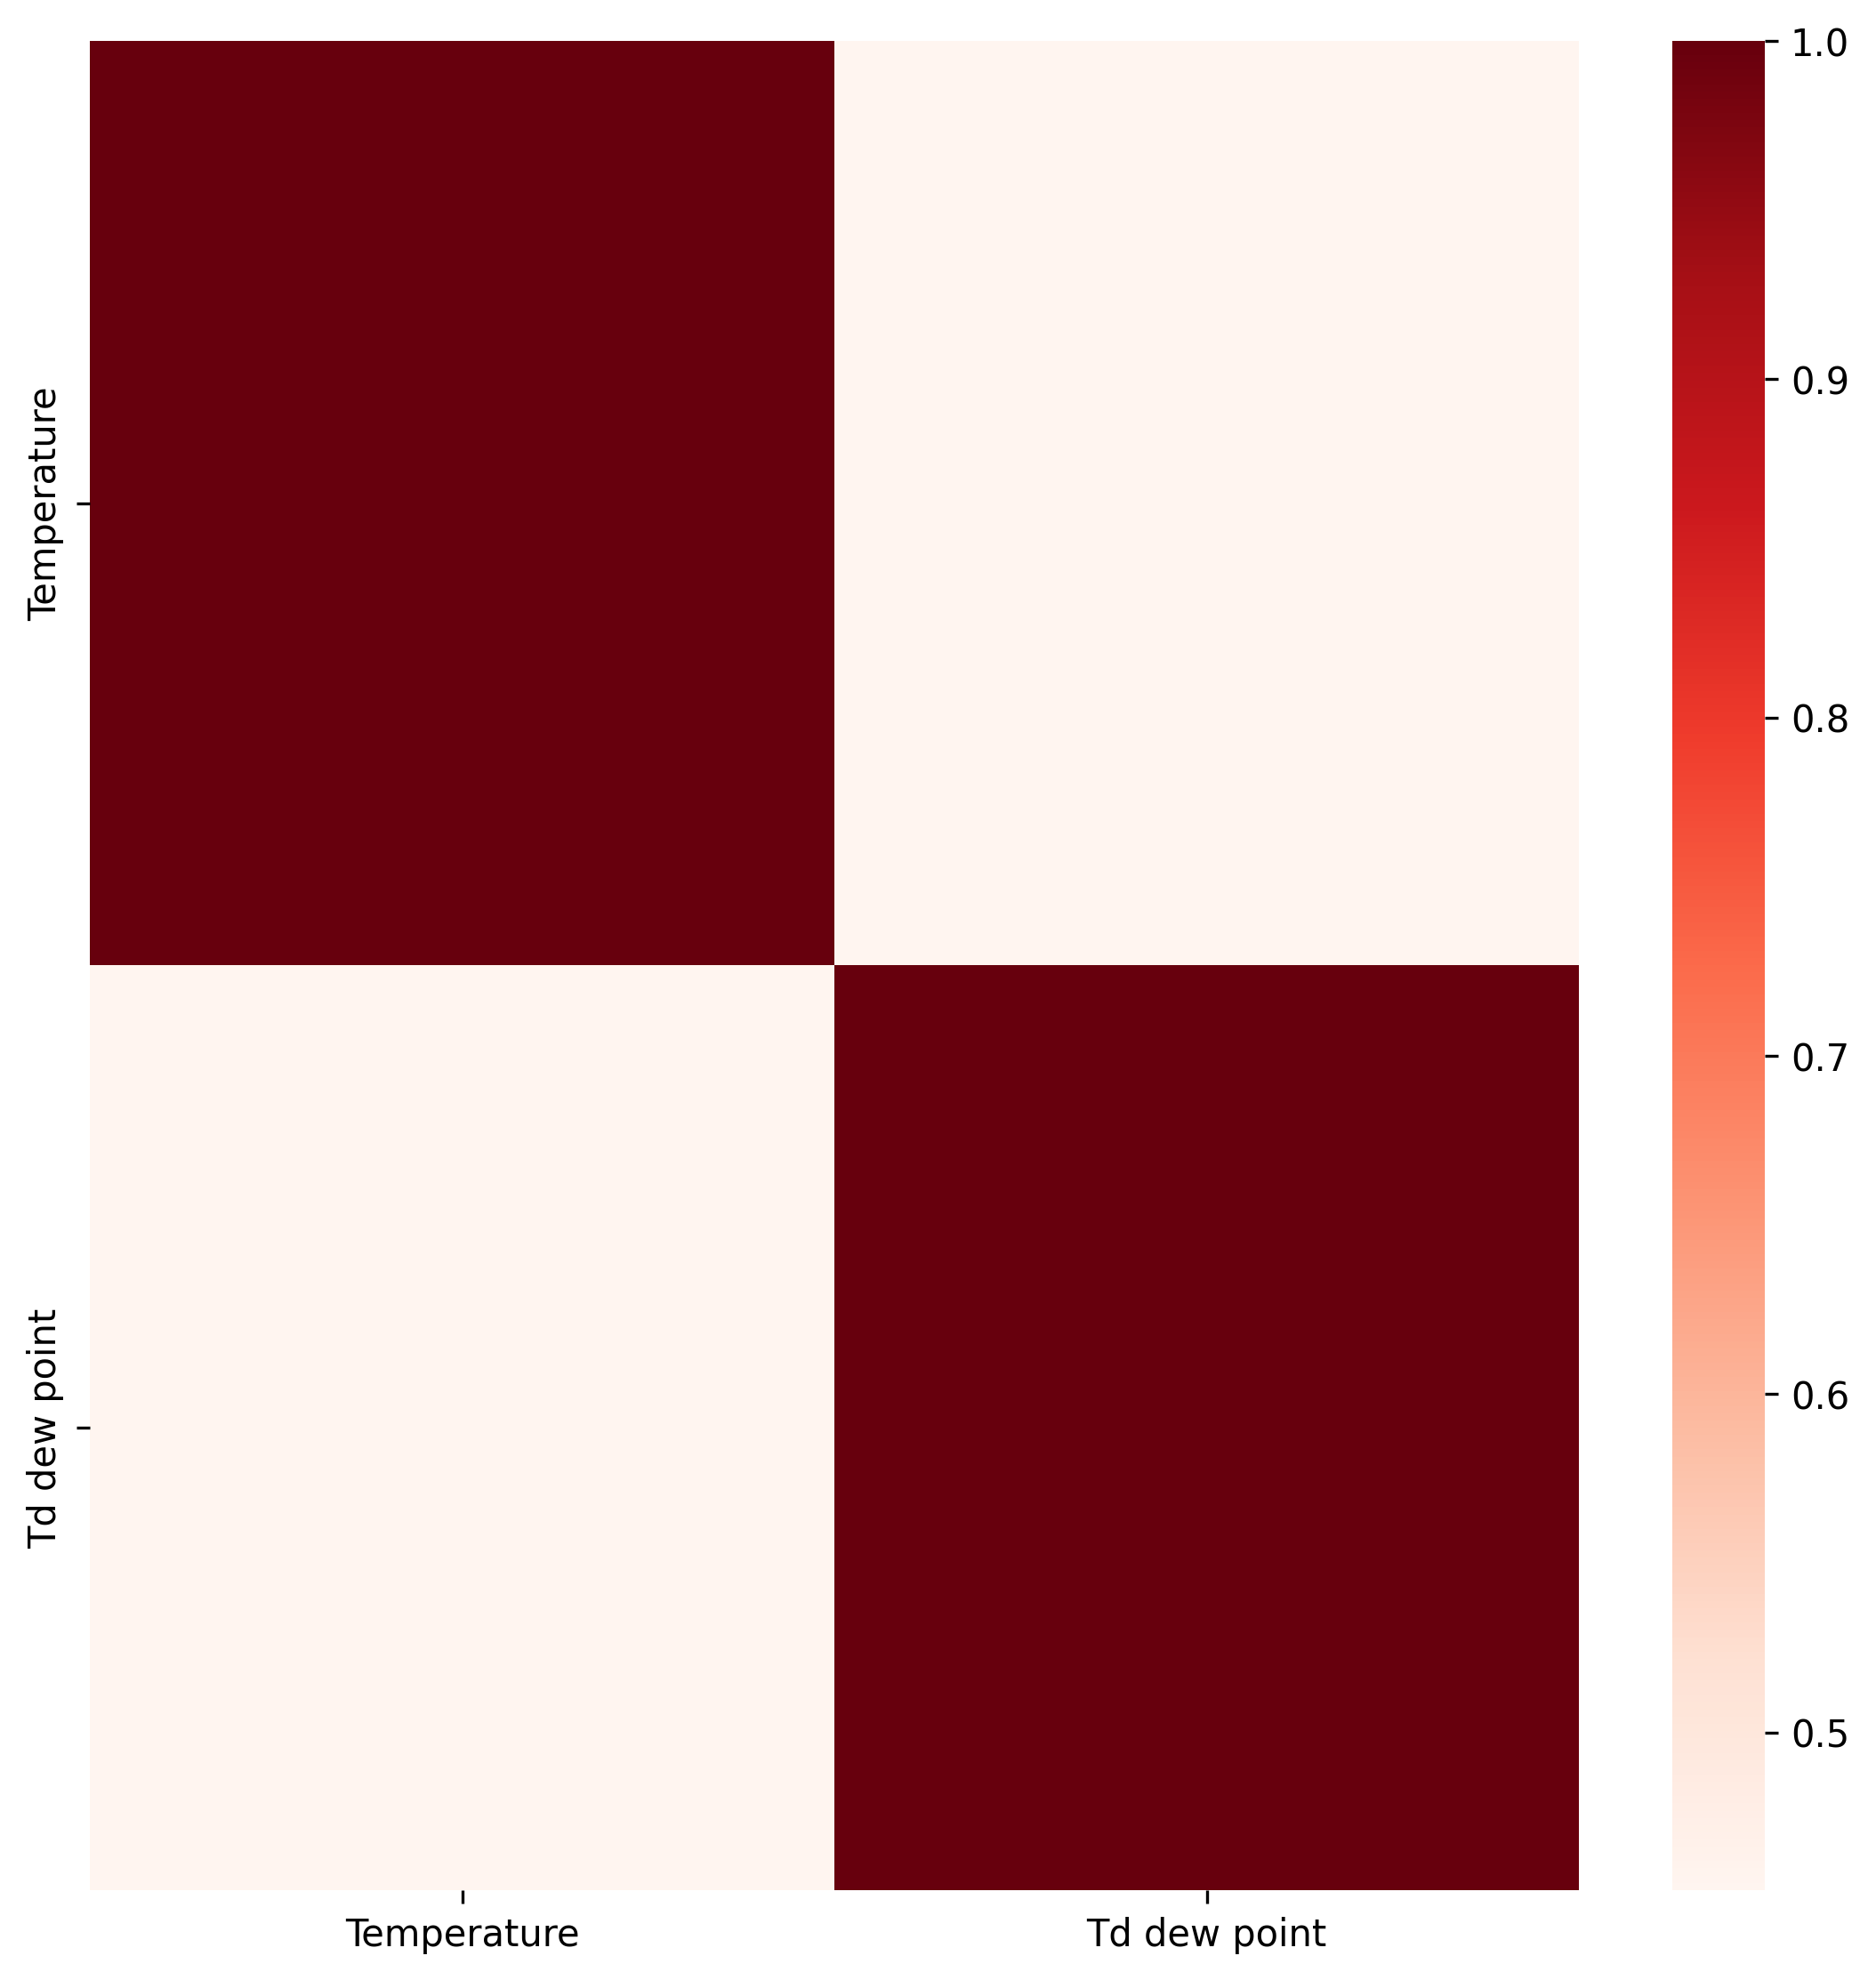

In [23]:
from pandas.io.formats.printing import PrettyDict
from IPython.utils import encoding
from google.colab import drive
drive.mount("/content/drive")
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import numpy as np
df = pd.read_csv("/content/drive/MyDrive/機器學習/期中考/彙整資料集_109b13595_郭承翰.csv")
# # 檢視資料前5筆
# print(df_final.head())
# print("-------------------------------------------------------------")
# # 檢視資料統計資訊
# print(df_final.describe())
# print("-------------------------------------------------------------")
# # 檢查資料缺失值
# print(df_final.isnull().sum())
# print("-------------------------------------------------------------")
# # 檢查資料數量
# print(len(df_final))
# print("-------------------------------------------------------------")
# # 資料探索-散佈圖
# df_final.plot.scatter(x="step", y="cal")


#,'StnPres','SeaPres','Temperature','Td dew point','RH','WS','WD','WSGust','WDGust','Precp','PrecpHour','SunShine','GloblRad','Visb','UVI','Cloud','Amount','step','cal'

#建立特徵矩陣，將需要進行分群的欄位挑選出來，組成一個新的DataFrame。
features = ['Temperature','Td dew point']
X = df[features]
#對特徵矩陣進行標準化。
scaler = StandardScaler()
X = scaler.fit_transform(X)
# print(X)

#建立K-means分群模型，設定要分成的群數。
kmeans = KMeans(n_clusters=2)
#將特徵矩陣傳入K-means模型進行分群，取得每一筆資料所屬的群組。
y_pred = kmeans.fit_predict(X)
#將分群結果加入DataFrame中。
df['cluster'] = y_pred
print(y_pred)
df['pred']=y_pred
c={0:'r',1:'g'}
df['colors']=df['pred'].map(c)
df3=plt.scatter(df['Temperature'],df['Td dew point'],c=df['colors'])
df5=pd.DataFrame(X,columns=['Temperature', 'Td dew point'])
df5
# df4 = df3.drop(columns=['colors'])
plt.figure(figsize=(9,9),dpi=300)
abc=df5.corr()
sns.heatmap(abc,cmap='Reds')
# plt.show

# grouped = df.groupby('cluster').mean()
# print(grouped.plot)
# print(X)
# for i in range(len(grouped.columns)):
# plt.scatter(df['Temperature'], df['Td dew point'], c=df['RH'], cmap='viridis')
# plt.xlabel('Temperature')
# plt.ylabel('Td dew point')
# plt.title('image')
# plt.show()